![Typing SVG](https://readme-typing-svg.demolab.com/?lines=SENTIMENT+ANALYSIS+OF+MOVIE+REVIEWS+NLP)

## <center>Sentiment Analysis of Movie Reviews using NLP with TF-IDF and ML Models
---
<div>
     <center>  <b><br> <center> Project Type: Natural Language Processing (NLP) Project<br></b><center>  <b><br>  <center> Author Name: Din Mohammad Dohan<br></b>
 <center>  <b><br> <center> Publising Date: November 27, 2023<br></b>
</div>

![](https://i.imgur.com/6Wfmf2S.png)

> The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis. The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & Compare different ML models
3. Document & notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

In [ ]:
import os

In [ ]:
# Create the Kaggle config directory if it doesn't exist
os.makedirs('/content/.kaggle', exist_ok=True)

# Move kaggle.json into the .kaggle directory
shutil.move('kaggle.json', '/content/.kaggle/kaggle.json')

# Set environment variable for Kaggle API
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

# Set permissions
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
replace data/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/train.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')
raw_df


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values


array(['exposed', 'intermittently good time',
       "-LRB- Allen 's -RRB- best works understand why snobbery is a better satiric target than middle-America diversions could ever be .",
       'as the hero of the story rediscovers his passion in life',
       'will enthrall the whole family',
       'about it from the bland songs to the colorful but flat drawings',
       "Coppola 's directorial debut", "Lai 's",
       "we feel as if we 're seeing something purer than the real thing",
       'these two 20th-century footnotes'], dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')
test_df


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df = pd.read_csv(sub_fname)
sub_df


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
raw_df.Sentiment.value_counts(normalize =True)

,proportion
Sentiment,
2,0.509945
3,0.210989
1,0.174760
4,0.058990
0,0.045316


<Axes: xlabel='Sentiment'>

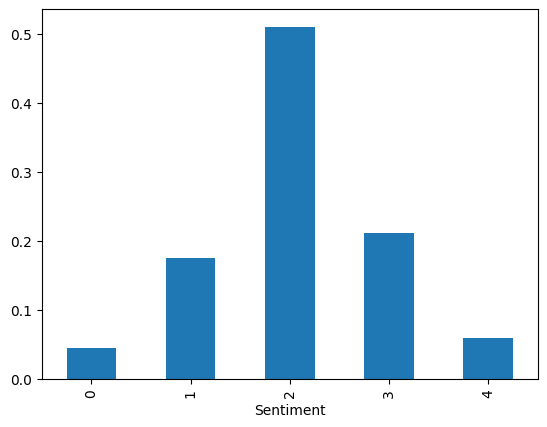

In [ ]:
raw_df.Sentiment.value_counts(normalize =True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* Distribution of Sentiments: The dataset contains sentiment labels ranging from 0 to 4, representing negative to positive sentiments. From the provided data, it appears that neutral sentiments (label 2) have the highest representation, followed by somewhat positive (label 3) and somewhat negative (label 1) sentiments. Negative (label 0) and positive (label 4) sentiments have lower representation.
* Sentiment Intensity: The numerical values associated with each sentiment may represent the intensity or strength of that sentiment. For example, sentiment label 2 (neutral) has the highest numerical value, which might suggest a moderate intensity of sentiment, while sentiment labels 0 and 4 (negative and positive) have lower numerical values, suggesting lower intensity.
* Data Balance: Depending on the context and application, it's important to consider the balance of sentiment labels in the dataset. In this case, there appears to be an imbalance, with neutral sentiments dominating the dataset. This could impact the performance of sentiment analysis models, as they may become biased towards predicting neutral sentiments.

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize('you really wanna go with us?, that would be fantasy')

['you',
 'really',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasy']

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
def tokenize (text):
   return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
tokenize ('you really wanna go with us?, that would be fantasy')

['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasi']

In [ ]:
def tokenizeWithoutPunctuation (text):
   return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenizeWithoutPunctuation ('you really wanna go with us?, that would be fantasy')

['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 'that',
 'would',
 'be',
 'fantasi']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [ ]:
selected_stopwords = english_stopwords[:115]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer =tokenizeWithoutPunctuation,
                            stop_words=selected_stopwords,
                            ngram_range=(1,2),
                            max_features =2000)


In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenizeWithoutPunctuation at 0x7ecd16a99d00>)

In [ ]:
len (vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abil', 'abil to', 'abl', 'abl to', 'abov', 'absolut', 'absorb',
       'abstract', 'absurd', 'accent', 'accept', 'access', 'accomplish',
       'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'admir', 'admit',
       'adolesc', 'adult', 'adventur', 'affair', 'affect', 'age', 'ago',
       'ahead', 'aim', 'air', 'alien', 'aliv', 'allen', 'allow', 'almost',
       'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway',
       'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti', 'america',
       'american', 'among', 'amount', 'amus', 'analyz', 'angst', 'ani',
       'ani the', 'anim', 'annoy', 'anoth', 'answer', 'anyon',
       'anyon who', 'anyth', 'apart', 'appar', 'appeal', 'appeal to',
       'appear', 'appreci', 'approach', 'area', 'argu', 'around', 'arriv',
       'art', 'artifici', 'artist', 'ask', 'aspect', 'aspir', 'assassin',
   

## Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs =  vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22672932,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27107452, 0.24064156, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_df["Phrase"] = test_df["Phrase"].fillna("")
test_inputs = vectorizer.transform(test_df["Phrase"])


In [ ]:
test_inputs =  vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle

### Split Training and Validation Sets

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 612722 stored elements and shape (156060, 2000)>

In [ ]:
TRAIN_SIZE =110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

## Model 1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(verbose=2, n_jobs= -1, max_iter=500)

In [ ]:
lr_model.fit(train_inputs, train_targets)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LogisticRegression(max_iter=500, n_jobs=-1, verbose=2)

In [ ]:
train_preds = lr_model.predict(train_inputs)

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.6353

In [ ]:
val_preds = lr_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5749674337820234

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],          # L1 or L2 regularization
    'C': [0.001, 0.01, 0.1, 1, 1],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data (replace 'train_inputs' and 'train_targets' with your actual training data and labels)
grid_search.fit(train_inputs, train_targets)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and validation data using the best model
train_preds = best_model.predict(train_inputs)
val_preds = best_model.predict(val_inputs)

# Evaluate the best model on the training and validation sets
train_accuracy = best_model.score(train_inputs, train_targets)
val_accuracy = best_model.score(val_inputs, val_targets)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Best Hyperparameters:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.6356
Validation Accuracy: 0.5743


In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 235514 stored elements and shape (66292, 2000)>

In [ ]:
best_test_preds = best_model.predict(test_inputs)

In [ ]:
best_test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df.Sentiment = best_test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv', index=None)

## Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
122213,122214,6552,play one lewd scene,2
11996,11997,515,is a little too in love,1
20442,20443,912,timely as tomorrow,2
83789,83790,4331,should pay reparations to viewers .,1
56858,56859,2859,can easily imagine Benigni 's Pinocchio becomi...,4
42098,42099,2026,Midwest,2
1085,1086,39,keeps,2
7928,7929,323,If you ignore the cliches and concentrate on C...,2
24322,24323,1106,she sees it as a chance to revitalize what is ...,3
33068,33069,1550,a life like this can sound so dull,1


In [ ]:
small_inputs =  vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = lr_model.predict(small_inputs)

In [ ]:
small_preds

array([2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2])

## Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of my score

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 235514 stored elements and shape (66292, 2000)>

In [ ]:
test_preds = lr_model.predict(test_inputs)

In [ ]:
test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv', index=None)

## Train & Compare Different ML Models


Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

## Model 2 - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(train_inputs,train_targets)

MultinomialNB()

In [ ]:
nb_train_preds = nb_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, nb_train_preds)

0.5826090909090909

In [ ]:
nb_val_preds = nb_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets,nb_val_preds )

0.5428354320451585

## Model 3 - Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

In [ ]:
gb_model.fit(train_inputs,train_targets)

GradientBoostingClassifier(learning_rate=1.0, random_state=0)

In [ ]:
gb_train_preds = gb_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, gb_train_preds)

0.5650818181818181

In [ ]:
gb_val_preds = gb_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, gb_val_preds )

0.5260312635692574

## Model 4 - Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [ ]:
dt_train_preds = dt_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, dt_train_preds)

0.8067181818181818

In [ ]:
dt_val_preds = dt_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, dt_val_preds )

0.5127876682587929

## Model 5 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(train_inputs,train_targets)

RandomForestClassifier()

In [ ]:
rf_train_preds = rf_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, rf_train_preds)

0.8067181818181818

In [ ]:
rf_val_preds = rf_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, rf_val_preds )

0.5476335214937038

## Model 6 - SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(train_inputs,train_targets)

SVC()

In [ ]:
svm_train_preds = svm_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, svm_train_preds)

0.7391818181818182

In [ ]:
svm_val_preds = svm_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, svm_val_preds )

0.5731871471993053

Best Model:

Logistic Regression

(include Kaggle score screenshot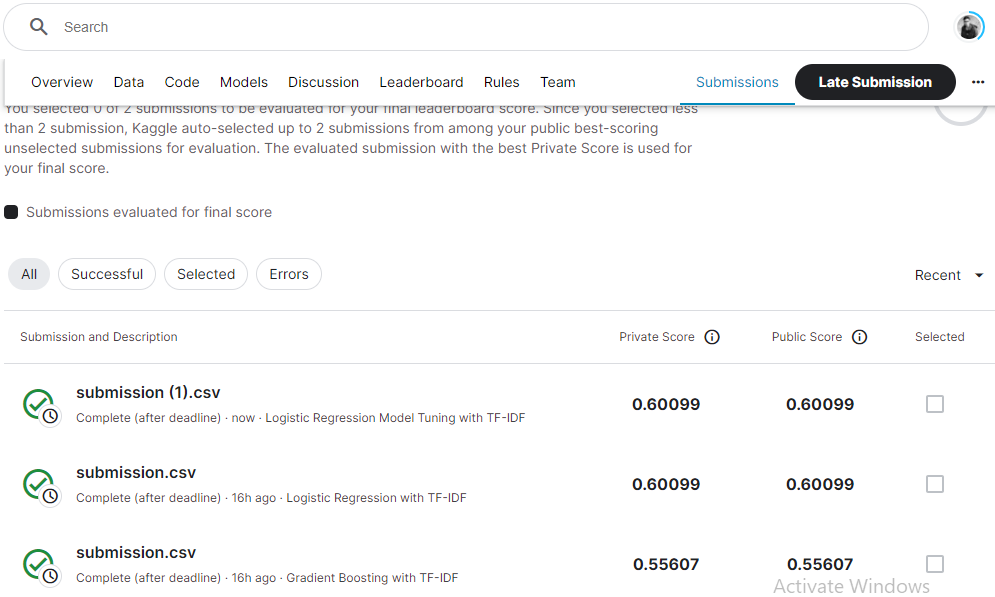)

## Future Work

- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
